03717357-Gregory Ollivierre - part b

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import sklearn.linear_model as linear_model
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
pd.options.mode.chained_assignment = None

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("data_b.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
#all columns numerical except Diagnosis. Lets investigate that feature.
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
# ok so only malignant and benign. Lets encode benign with 0 and malignant as 1.
df['diagnosis'] = df['diagnosis'].apply(lambda x : {'B':0,'M':1}[x])
df['diagnosis'].unique()

array([1, 0], dtype=int64)

lets check for Nan's'

In [7]:
df.isnull().any().any()

True

In [8]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [9]:
# lets drop unnamed column
df = df.drop('Unnamed: 32',axis=1)

In [10]:
#lets shuffle the rows
df1 = df.sample(frac=1)
target = df1['diagnosis']
inputs = df1.drop('diagnosis',axis=1)

In [11]:
X = inputs.values
y = target.values
k_fold = KFold(n_splits=5)
k_fold.get_n_splits(X)
accs = []
for train_idx, test_idx in k_fold.split(X):
    train_X, test_X = X[train_idx], X[test_idx]
    train_y, test_y = y[train_idx], y[test_idx]
    clf = linear_model.LogisticRegression()
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)
    acc = metrics.f1_score(test_y, predictions, average='micro') # mean average percentage error
    accs.append(acc)
print(np.mean(accs))
print(np.std(accs))
print(accs)

0.6050923769600993
0.2556649069726439
[0.37719298245614036, 0.3684210526315789, 0.9298245614035088, 0.4473684210526316, 0.9026548672566371]


[31/31] features ████████████████████ Time elapsed: 0 seconds

(<matplotlib.figure.Figure at 0x1d7e0c04198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d7e0c60b00>)

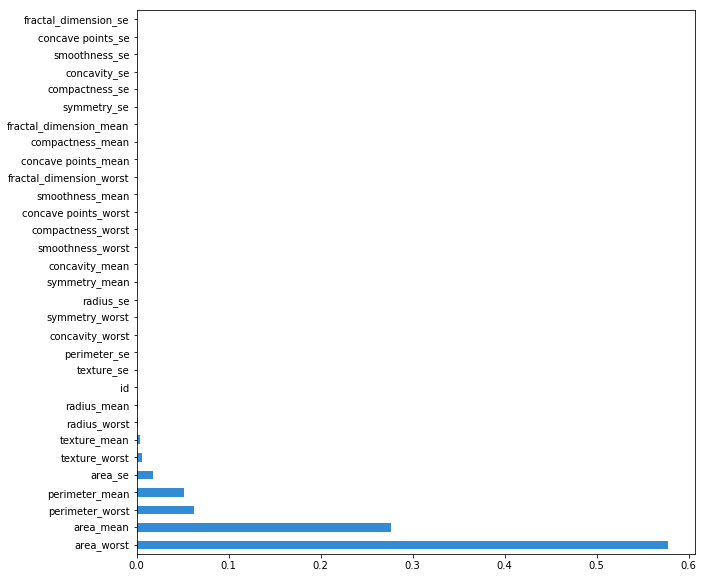

In [12]:
model = InMemoryModel(clf.predict_proba, examples = train_X)
interpreter = Interpretation(train_X, feature_names=inputs.columns)
matplotlib.rcParams['figure.figsize'] = [10, 10]
interpreter.feature_importance.plot_feature_importance(model)

This seems to show that the area of the worst affected spot is the most significant feature. Intuitively though, someones' ID number should not affect thier chance of having a malignant tumor. Lets remove the ID columns and rerun.

In [13]:
df2 = df.sample(frac=1)
target2 = df2['diagnosis']
inputs2 = df2.drop(['diagnosis','id'],axis=1)
X = inputs2.values
y = target2.values
k_fold = KFold(n_splits=5)
k_fold.get_n_splits(X)
accs = []
for train_idx, test_idx in k_fold.split(X):
    train_X, test_X = X[train_idx], X[test_idx]
    train_y, test_y = y[train_idx], y[test_idx]
    clf = linear_model.LogisticRegression()
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)
    acc = metrics.f1_score(test_y, predictions, average='micro') # mean average percentage error
    accs.append(acc)
print(np.mean(accs))
print(np.std(accs))
print(accs)

0.9507529886663562
0.014437132325342394
[0.9385964912280702, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9292035398230089]


[30/30] features ████████████████████ Time elapsed: 0 seconds

(<matplotlib.figure.Figure at 0x1d7e0dbf320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d7e0db80b8>)

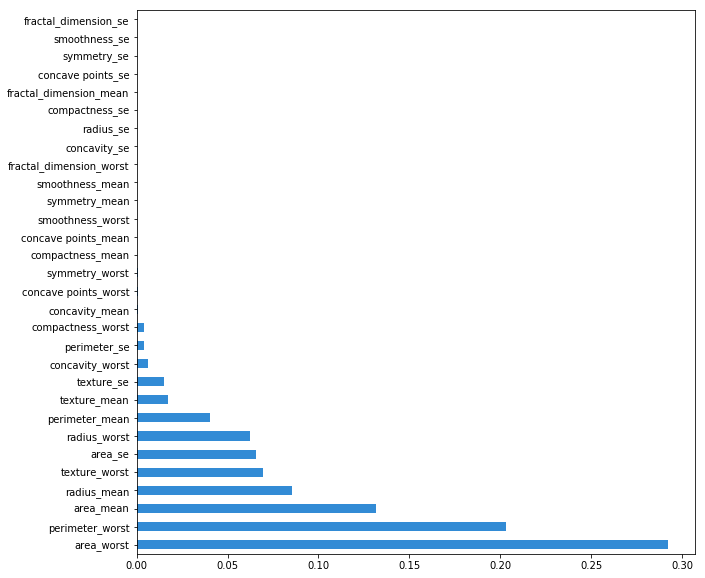

In [14]:
model = InMemoryModel(clf.predict_proba, examples = train_X)
interpreter = Interpretation(train_X, feature_names=inputs2.columns)
matplotlib.rcParams['figure.figsize'] = [10, 10]
interpreter.feature_importance.plot_feature_importance(model)

ok so this now makes some more sense intuitively. Attributes that capture the size of a tumor like area, radius and perimeter have a significant impact of the malignancy probability of a tumor.